# Decision Trees

## importing

In [17]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

## Downloading Dataset

In [ ]:
# !wget -O drug200.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv

### Reading the data with pandas

In [2]:
#delimiter: as a separating boundary which distinguishes between any two subsequent data item
my_data = pd.read_csv("drug200.csv", delimiter=",")
my_data[0:5]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


#### - To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:

In [25]:
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
y = my_data["Drug"]

print(X[0:5],'\n')
print(y[0:5])

[[23 'F' 'HIGH' 'HIGH' 25.355]
 [47 'M' 'LOW' 'HIGH' 13.093]
 [47 'M' 'LOW' 'HIGH' 10.114]
 [28 'F' 'NORMAL' 'HIGH' 7.798]
 [61 'F' 'LOW' 'HIGH' 18.043]] 

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object


#### - We must convert these Values to numerical values

In [26]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

### Making dataset   -    Train Test Split

In [27]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=4)
y_trainset

77     drugY
127    drugX
5      drugX
118    drugA
113    drugX
       ...  
104    drugY
129    drugX
183    drugY
174    drugA
122    drugY
Name: Drug, Length: 140, dtype: object

### Training Model
[link-DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [45]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree 

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [46]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

### Prediction

In [52]:
predTree = drugTree.predict(X_testset) #y-hat

In [48]:
print (predTree [0:5])
print (y_testset [0:5].values)

['drugY' 'drugY' 'drugY' 'drugY' 'drugC']
['drugY' 'drugY' 'drugY' 'drugY' 'drugC']


/tmp/ipykernel_4412/2304716785.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print (y_testset [0:5].values)


### Accuracy evaluation


In [53]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9666666666666667


### Data Visualization
- You must download and install the following libraries

In [54]:
# !sudo apt-get install graphviz
# !pip3 install pydotplus 
# !pip3 install graphviz 

In [57]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

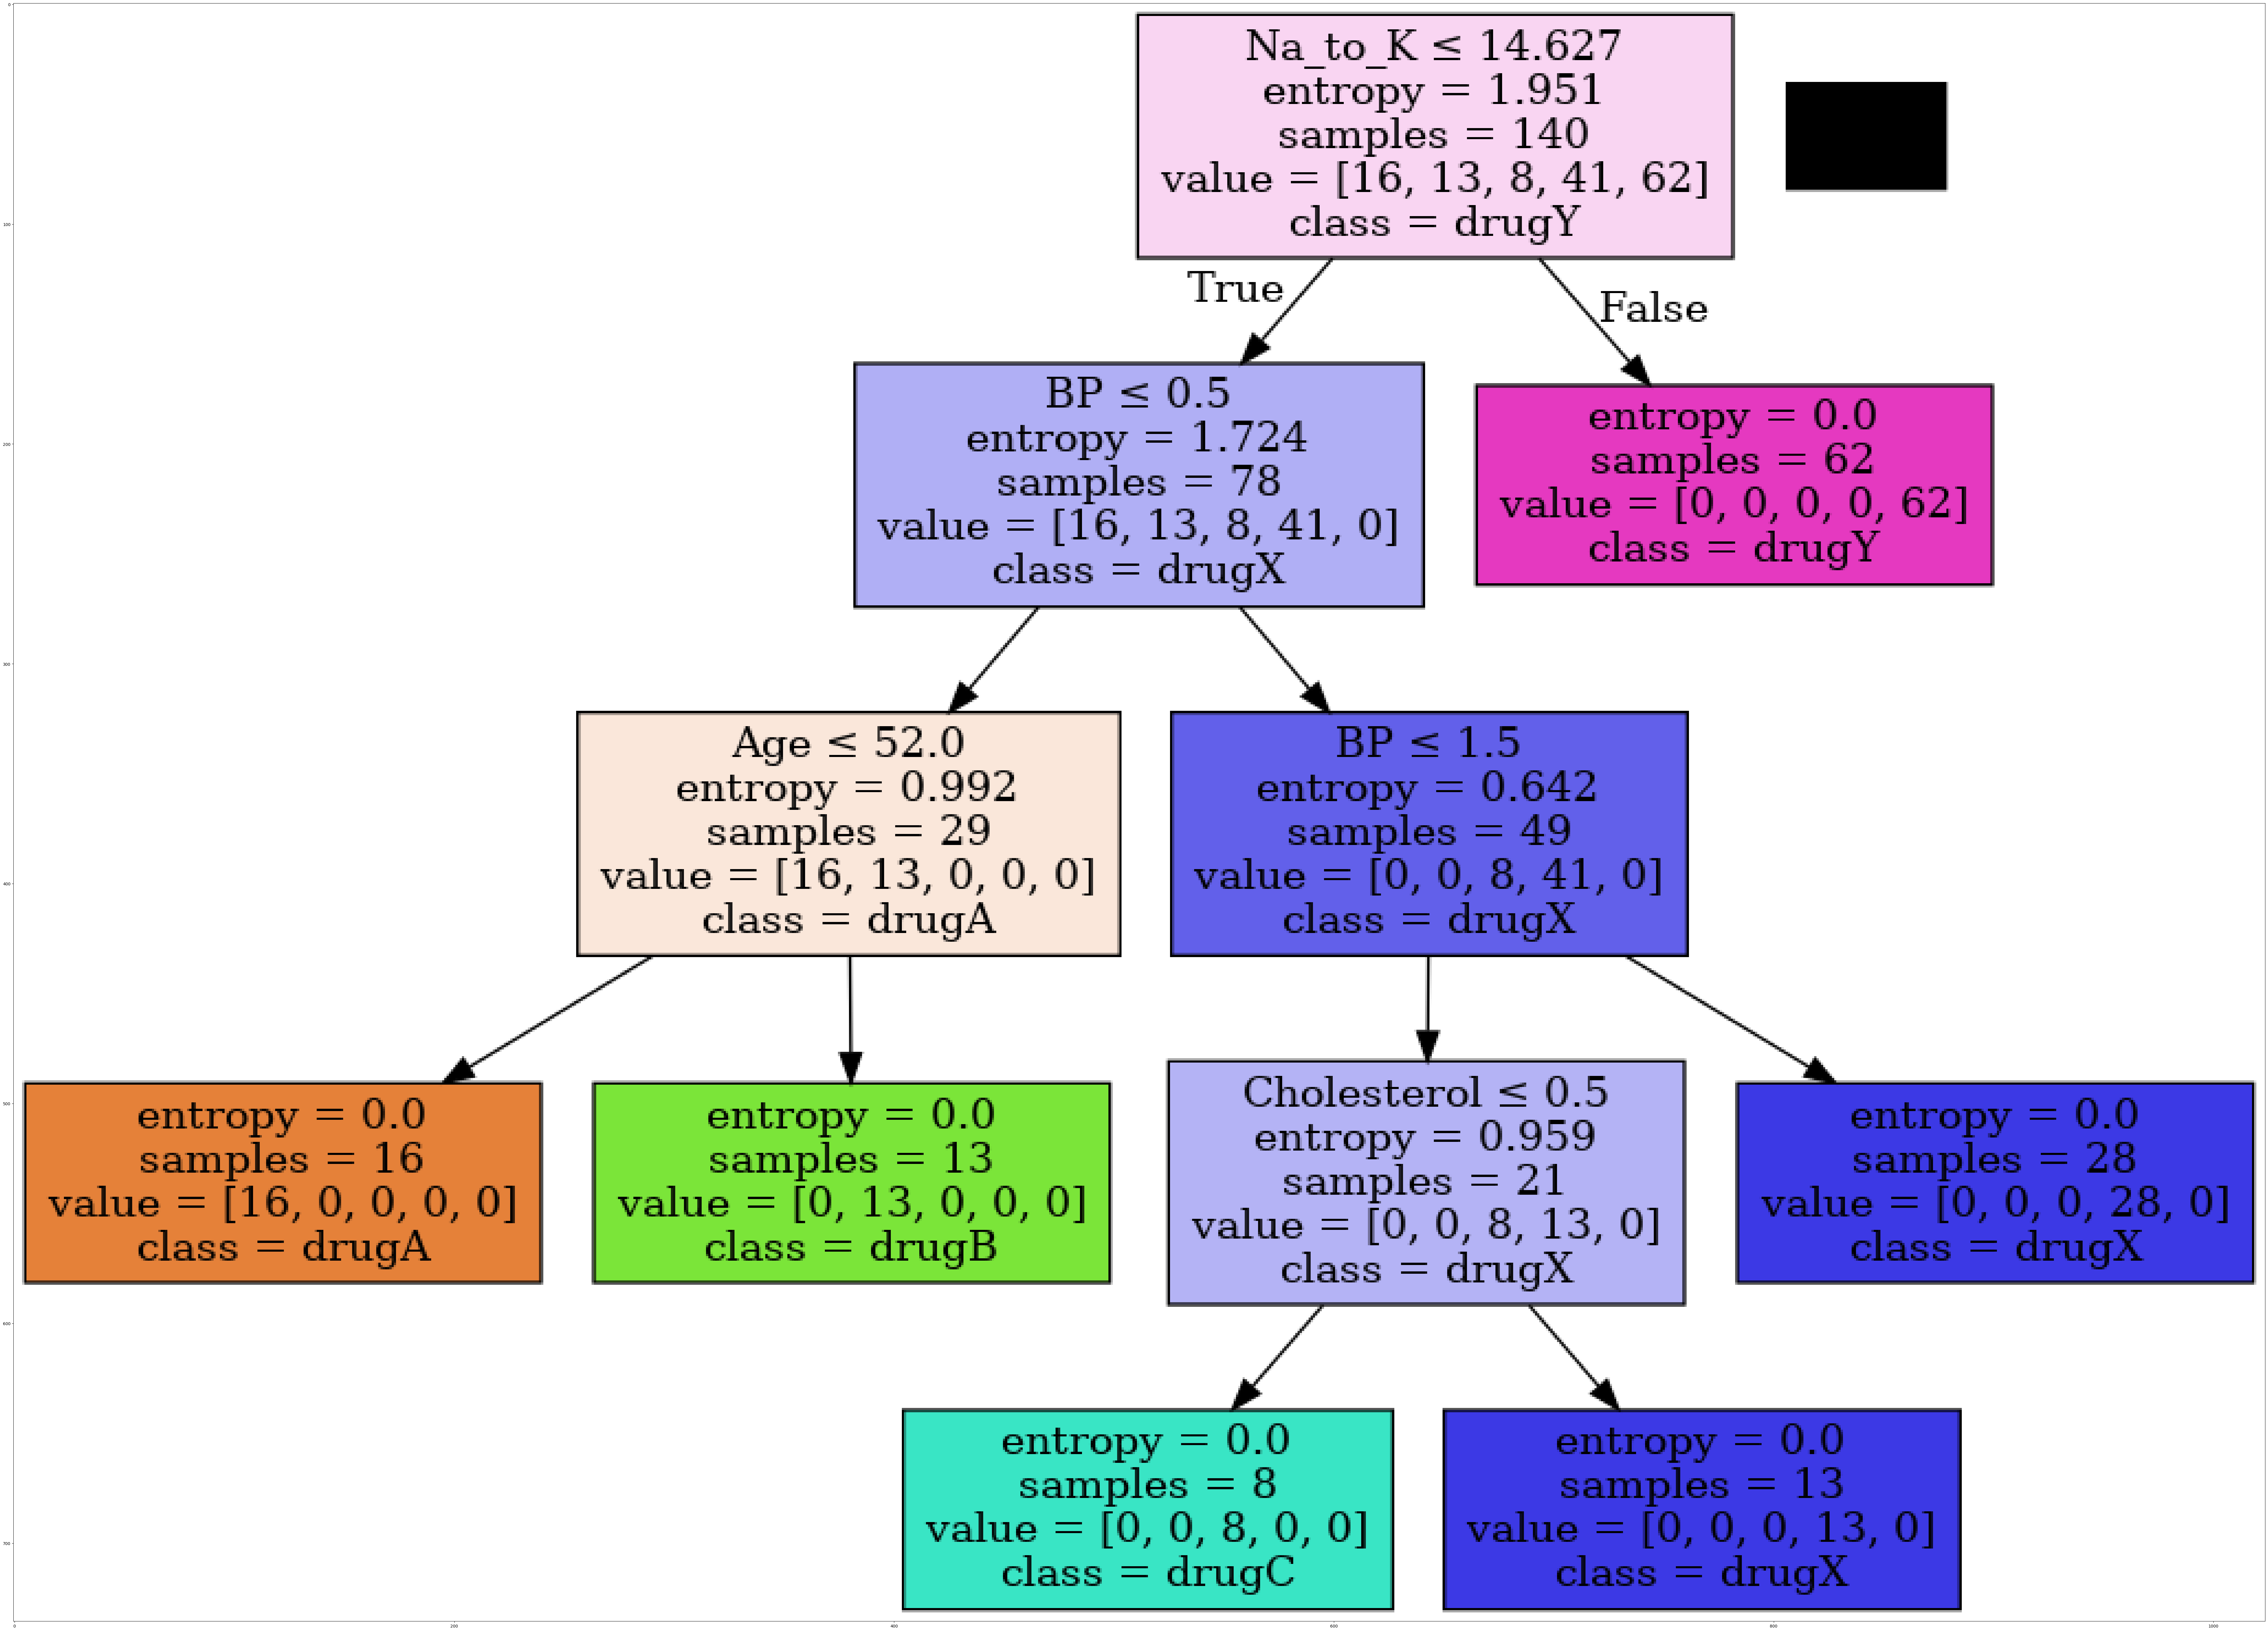

In [56]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = my_data.columns[0:5]
out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')